In [1]:
import bs4
import requests
import pandas as pd
import numpy as np
import time

In [2]:
mit = pd.read_csv('MIT_Text')
sd = pd.read_csv('SD_Text')
ec = pd.read_csv('IEEE_Text')
acm = pd.read_csv('ACM_Text')
stn = pd.read_csv('STN_Text')

In [3]:
mit.drop_duplicates(subset='Heading',keep='last',inplace=True)
sd.drop_duplicates(subset='Heading',keep='last',inplace=True)
ec.drop_duplicates(subset='Heading',keep='last',inplace=True)
acm.drop_duplicates(subset='Heading',keep='last',inplace=True)
stn.drop_duplicates(subset='Heading',keep='last',inplace=True)

sd.dropna(inplace=True)
ec.dropna(inplace=True)
acm.dropna(inplace=True)
mit.dropna(inplace=True)
stn.dropna(inplace=True)

In [4]:
df = pd.concat([mit,sd,ec,stn,acm])

In [5]:
df.head()

,Category,Date,Heading,Source,Text,Time,URL,Unnamed: 0
0,Computer Science,2019-09-09,MIT named No. 3 university by U.S. News for 2020,MIT News,"For a second year in a row, U.S. News and Wo...",-,http://news.mit.edu/2019/mit-named-no-3-univer...,0
1,Computer Science,2019-09-06,Breakthrough Prize in Fundamental Physics awar...,MIT News,The Event Horizon Telescope (EHT) Collaborat...,-,http://news.mit.edu/2019/breakthrough-prize-ph...,1
2,Research,2019-09-06,How to make a book last for millennia,MIT News,First discovered in 1947 by Bedouin shepherd...,-,http://news.mit.edu/2019/temple-scroll-ancient...,2
3,Nasa,2019-09-05,Taking the next giant leaps,MIT News,"In July, the world celebrated the 50th anniv...",-,http://news.mit.edu/2019/taking-next-giant-lea...,3
4,Computer Science,2019-09-05,Cleaning up hydrogen peroxide production,MIT News,The most common process for making hydrogen ...,-,http://news.mit.edu/2019/solugen-hydrogen-pero...,4


In [6]:
def get_len(x):
    length = len(x)
    
    return length

def fix_g(x):
    if 'Q&A' in x:
        return 'nil'
    elif '3 Questions:' in x:
        return 'nil'
    else:
        return x


In [7]:
df['Length'] = df['Text'].apply(get_len)
df['Heading'] = df['Heading'].apply(fix_g)
df = df[df['Heading']!='nil']
df = df[df['Text']!='']

In [8]:
df = df.reset_index(drop=True)
df.drop(['Unnamed: 0'],axis=1,inplace=True)
df.head()

,Category,Date,Heading,Source,Text,Time,URL,Length
0,Computer Science,2019-09-09,MIT named No. 3 university by U.S. News for 2020,MIT News,"For a second year in a row, U.S. News and Wo...",-,http://news.mit.edu/2019/mit-named-no-3-univer...,2116
1,Computer Science,2019-09-06,Breakthrough Prize in Fundamental Physics awar...,MIT News,The Event Horizon Telescope (EHT) Collaborat...,-,http://news.mit.edu/2019/breakthrough-prize-ph...,5089
2,Research,2019-09-06,How to make a book last for millennia,MIT News,First discovered in 1947 by Bedouin shepherd...,-,http://news.mit.edu/2019/temple-scroll-ancient...,7820
3,Nasa,2019-09-05,Taking the next giant leaps,MIT News,"In July, the world celebrated the 50th anniv...",-,http://news.mit.edu/2019/taking-next-giant-lea...,7848
4,Computer Science,2019-09-05,Cleaning up hydrogen peroxide production,MIT News,The most common process for making hydrogen ...,-,http://news.mit.edu/2019/solugen-hydrogen-pero...,7370


In [9]:
df['Category'].value_counts()

Computer Science                  903
ACM                               738
Robotics                          479
Space & Time                      473
Nanoscience and nanotechnology    437
Fossils & Ruins                   435
Research                          432
Matter & Energy                   409
Education & Learning              397
Business & Industry               394
Mind & Brain                      377
Earth & Climate                   372
Computers & Math                  357
Energy                            352
Aerospace                         346
Science & Society                 340
Health & Medicine                 340
Plants & Animals                  339
Telecom                           330
Living Well                       324
NASA                              202
Science & Technology              134
Environment                       124
Social Sciences                   124
Humanities                        123
Health                            118
Internationa

In [10]:
df['Old_Category'] = df['Category'] ## New Columns to store old category

In [11]:
def fix_cat(x):
    if (x=='Cybersecurity'):
        return 'Computer Science'
    elif (x=='Living Well' or x=='Mind & Brain' or x=='Health & Medicine'):
        return 'Health'
    elif(x=='Plants & Animals' or x=='Earth & Climate'):
        return 'Environment'
    elif(x=='Business & Industry' or x=='Education & Learning' or x=='Gadgets'):
        return 'Society'
    elif(x=='NASA' or x=='Aerospace' or x=='Nasa'):
        return 'Space & Time'
    elif(x=='Research'):
        return 'Research'
    elif(x=='Telecommunications' or x=='Semiconductors' or x=='electronics' or x=='Nanoscience and nanotechnology' or x=='Green Tech' or x=='Nanotech'):
        return 'Electronics and Technology'
    elif(x=='International' or x=='Entrepreneurship' or x=='Undergraduate' or x=='Humanities'):
        return 'Others'
    elif(x=='Social Sciences' or x=='Science & Technology' or x=='Science & Society'):
        return 'Science'
    elif(x=='Fossils & Ruins' or x=='Energy'):
        return 'Matter & Energy'
    
    else:
        return x


In [12]:
df['Category'] = df['Category'].apply(fix_cat) ## Reducecd Number of Categories

In [13]:
df=df.sort_values(by='Category')

### Text preprocessing

In [14]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
import re
import string
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from num2words import num2words
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to C:\Users\drago/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\drago/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\drago/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [15]:
stop = ['a', 'about', 'above', 'across', 'after', 'afterwards', 'again', 'against', 'all', 'almost', 'alone',
             'along', 'already', 'also', 'although', 'always', 'am', 'among', 'amongst', 'amoungst', 'amount',
             'an', 'and', 'another', 'any', 'anyhow', 'anyone', 'anything', 'anyway', 'anywhere', 'are', 'around',
             'as', 'at', 'back', 'be', 'became', 'because', 'become', 'becomes', 'becoming', 'been', 'before',
             'beforehand', 'behind', 'being', 'below', 'beside', 'besides', 'between', 'beyond', 'bill', 'both',
             'bottom', 'but', 'by', 'call', 'can', 'cannot', 'cant', 'co', 'con', 'could', 'couldnt', 'cry', 'de',
             'describe', 'detail', 'did', 'do', 'does', 'doing', 'don', 'done', 'down', 'due', 'during', 'each', 'eg',
             'eight', 'either', 'eleven', 'else', 'elsewhere', 'empty', 'enough', 'etc', 'even', 'ever', 'every', 'everyone',
             'everything', 'everywhere', 'except', 'few', 'fifteen', 'fify', 'fill', 'find', 'fire', 'first', 'five', 'for',
             'former', 'formerly', 'forty', 'found', 'four', 'from', 'front', 'full', 'further', 'get', 'give', 'go', 'had',
             'has', 'hasnt', 'have', 'having', 'he', 'hence', 'her', 'here', 'hereafter', 'hereby', 'herein', 'hereupon',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'however', 'hundred', 'i', 'ie', 'if', 'in', 'inc', 'indeed',
             'interest', 'into', 'is', 'it', 'its', 'itself', 'just', 'keep', 'last', 'latter', 'latterly', 'least', 'less',
             'ltd', 'made', 'many', 'may', 'me', 'meanwhile', 'might', 'mill', 'mine', 'more', 'moreover', 'most', 'mostly',
             'move', 'much', 'must', 'my', 'myself', 'name', 'namely', 'neither', 'never', 'nevertheless', 'next', 'nine',
             'no', 'nobody', 'none', 'noone', 'nor', 'not', 'nothing', 'now', 'nowhere', 'of', 'off', 'often', 'on', 'once',
             'one', 'only', 'onto', 'or', 'other', 'others', 'otherwise', 'our', 'ours', 'ourselves', 'out', 'over', 'own',
             'part', 'per', 'perhaps', 'please', 'put', 'rather', 're', 's', 'same', 'see', 'seem', 'seemed', 'seeming',
             'seems', 'serious', 'several', 'she', 'should', 'show', 'side', 'since', 'sincere', 'six', 'sixty', 'so', 
             'some', 'somehow', 'someone', 'something', 'sometime', 'sometimes', 'somewhere', 'still', 'such', 'system',
             't', 'take', 'ten', 'than', 'that', 'the', 'their', 'theirs', 'them', 'themselves', 'then', 'thence', 'there',
             'thereafter', 'thereby', 'therefore', 'therein', 'thereupon', 'these', 'they', 'thickv', 'thin', 'third', 'this',
             'those', 'though', 'three', 'through', 'throughout', 'thru', 'thus', 'to', 'together', 'too', 'top', 'toward',
             'towards', 'twelve', 'twenty', 'two', 'un', 'under', 'until', 'up', 'upon', 'us', 'very', 'via', 'was', 'we',
             'well', 'were', 'what', 'whatever', 'when', 'whence', 'whenever', 'where', 'whereafter', 'whereas', 'whereby',
             'wherein', 'whereupon', 'wherever', 'whether', 'which', 'while', 'whither', 'who', 'whoever', 'whole', 'whom',
             'whose', 'why', 'will', 'with', 'within', 'without', 'would', 'yet', 'you', 'your', 'yours', 'yourself',
             'yourselves',
       'csail','faculty','honored','society','abroad','inner','cambridge','academic','school','interdisciplinary','athlete','senior','thirty','mit','team','mit researcher','laboratory','member','student','drug','approach','professor','graduate','phd',
        'stanford','university'
       ]

In [16]:
stop_words = stopwords.words('english')
stop_words.extend(stop)
stop = set(stop_words)
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()

In [17]:
def remove_backslashn(data):
    if('\n' in data):
        data=data.replace('\n',' ')
    return data

def remove_apostrophe(data):
    return np.char.replace(data, "'", "")
def remove_punctuation(data):
    for i in (exclude):
        data = np.char.replace(data, i, ' ')
        data = np.char.replace(data, "  ", " ")
    data = np.char.replace(data, ',', '')
    return data

def convert_numbers(data):
    tokens = word_tokenize(str(data))
    new_text = ""
    for w in tokens:
        try:
            w = num2words(int(w))
        except:
            a = 0
        new_text = new_text + " " + w
    new_text = np.char.replace(new_text, "-", " ")
    return new_text

def clean(data):
    stop_free = " ".join([i for i in data.split() if i not in stop])
    #stop_free = " ".join([i for i in data.lower().split() if i not in stop])

    normalized = " ".join(lemma.lemmatize(word) for word in stop_free.split())
    processed = re.sub(r"\d+","",normalized)
    return processed


In [18]:
df['Text'] = df['Text'].apply(remove_backslashn)
df['Text'] = df['Text'].apply(remove_apostrophe)
df['Text'] = df['Text'].apply(remove_punctuation)
df['Text'] = df['Text'].apply(convert_numbers)
df['Text'] = df['Text'].apply(clean)

In [19]:
df['Category'].value_counts()

Matter & Energy               1196
Health                        1159
Space & Time                  1027
Computer Science               929
Environment                    835
Society                        791
ACM                            738
Science                        598
Electronics and Technology     518
Robotics                       479
Research                       432
Computers & Math               357
Telecom                        330
Others                         305
Name: Category, dtype: int64

In [20]:
ACM = df[df['Category']=='ACM']
df = df[df['Category']!='ACM']

Computers_and_Math = df[df['Category']=='Computers & Math']
df = df[df['Category']!='Computers & Math']

Science = df[df['Category']=='Science']
df = df[df['Category']!='Science']

Research = df[df['Category']=='Research']
df = df[df['Category']!='Research']

In [21]:
df_all = pd.DataFrame.copy(df) ## Backup of dataframe

In [22]:
from io import StringIO
col = ['Category', 'Text','Old_Category']
df = df[col]
df = df[pd.notnull(df['Text'])]
df.columns = ['Category', 'Text','Old_Category']
df['category_id'] = df['Category'].factorize()[0]
category_id_df = df[['Category', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'Category']].values)
df.head()


,Category,Text,Old_Category,category_id
1549,Computer Science,Comparing genome different specie — different ...,Computer Science,0
1548,Computer Science,Until study human interaction mobile communica...,Computer Science,0
1545,Computer Science,At recent International Conference Robotics Au...,Computer Science,0
1543,Computer Science,For year research group MIT professor computer...,Computer Science,0
1542,Computer Science,Network analysis — mathematical analysis relat...,Computer Science,0


In [23]:
my_tags = df['Category'].unique()
my_tags

array(['Computer Science', 'Electronics and Technology', 'Environment',
       'Health', 'Matter & Energy', 'Others', 'Robotics', 'Society',
       'Space & Time', 'Telecom'], dtype=object)

In [24]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score
from nltk.tokenize import word_tokenize


In [25]:
X = df['Text']
y = df['Category']
z = df['Old_Category']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test,z_train,z_test = train_test_split(X, y,z, test_size=0.2, random_state=42)

In [26]:
df['Category'].value_counts()

Matter & Energy               1196
Health                        1159
Space & Time                  1027
Computer Science               929
Environment                    835
Society                        791
Electronics and Technology     518
Robotics                       479
Telecom                        330
Others                         305
Name: Category, dtype: int64

In [27]:
from sklearn.naive_bayes import MultinomialNB

tic = time.process_time()
nb = Pipeline([('vect', CountVectorizer(max_df=1000,min_df=80,ngram_range=(1, 2))),
               ('tfidf', TfidfTransformer(norm='l2')),
               ('clf', MultinomialNB()),
              ])
nb.fit(X_train, y_train)
from sklearn.metrics import classification_report
y_pred = nb.predict(X_test)

toc = time.process_time()

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_tags))
print()
print ("Multinomial Naive Bayes "+ "\n ----- Computation time = " + str((toc - tic)) + " seconds")

accuracy 0.7239101717305152
                            precision    recall  f1-score   support

          Computer Science       0.71      0.83      0.76       195
Electronics and Technology       0.68      0.69      0.68       115
               Environment       0.70      0.61      0.65       179
                    Health       0.70      0.77      0.73       228
           Matter & Energy       0.67      0.62      0.64       213
                    Others       0.89      0.67      0.76        63
                  Robotics       0.71      0.67      0.69        91
                   Society       0.69      0.76      0.73       161
              Space & Time       0.84      0.81      0.83       196
                   Telecom       0.84      0.71      0.77        73

               avg / total       0.73      0.72      0.72      1514


Multinomial Naive Bayes 
 ----- Computation time = 13.484375 seconds


In [28]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report

tic = time.process_time()
model = Pipeline([('vect', CountVectorizer(ngram_range=(1, 2),max_features=150000)),
               ('tfidf', TfidfTransformer(norm='l2',use_idf=True,smooth_idf=True)),
               ('bc', BaggingClassifier(SGDClassifier(epsilon=0.05,loss='hinge', penalty='l2',alpha=1e-4, random_state=101, max_iter=6,  tol=None),n_estimators=300)),
               ])
model.fit(X_train, y_train)
bagging_preds = model.predict(X_test)

toc = time.process_time()

print('accuracy %s' % accuracy_score(bagging_preds, y_test))
print(classification_report(y_test, bagging_preds))
print()
print ("SGDClassifier with bagging = " +"\n ----- Computation time = " + str((toc - tic)) + " seconds")

accuracy 0.7912813738441216
                            precision    recall  f1-score   support

          Computer Science       0.85      0.89      0.87       195
Electronics and Technology       0.87      0.85      0.86       115
               Environment       0.75      0.64      0.69       179
                    Health       0.74      0.79      0.77       228
           Matter & Energy       0.75      0.77      0.76       213
                    Others       0.92      0.78      0.84        63
                  Robotics       0.75      0.76      0.75        91
                   Society       0.72      0.76      0.74       161
              Space & Time       0.87      0.84      0.86       196
                   Telecom       0.83      0.85      0.84        73

               avg / total       0.79      0.79      0.79      1514


SGDClassifier with bagging = 
 ----- Computation time = 372.8125 seconds


#### SGDClassifier with bagging performs better but is too slow as compared to Navive Bayes Model

In [29]:
from sklearn.externals import joblib
# Output a pickle file for the model
#joblib.dump(nb, 'NaiveBayes_model_5.pkl')

In [30]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.Category.values, yticklabels=category_id_df.Category.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [31]:
df_comparison = pd.DataFrame(X_test,columns=['Text'])
df_comparison['Category'] = y_test
df_comparison['Predicted'] = y_pred
df_comparison['Old_Category'] = z_test
df_comparison.head()

,Text,Category,Predicted,Old_Category
7672,Hundreds financier Wall Street analyst C suite...,Telecom,Telecom,Telecom
1890,Nitric oxide NO important signaling molecule l...,Electronics and Technology,Electronics and Technology,Nanoscience and nanotechnology
8333,Stanford researcher identified gene predict in...,Health,Health,Health
408,As boy growing small South Indian village Vino...,Computer Science,Computer Science,Computer Science
2472,They learned intriguing new detail dynamic bar...,Space & Time,Space & Time,Space & Time


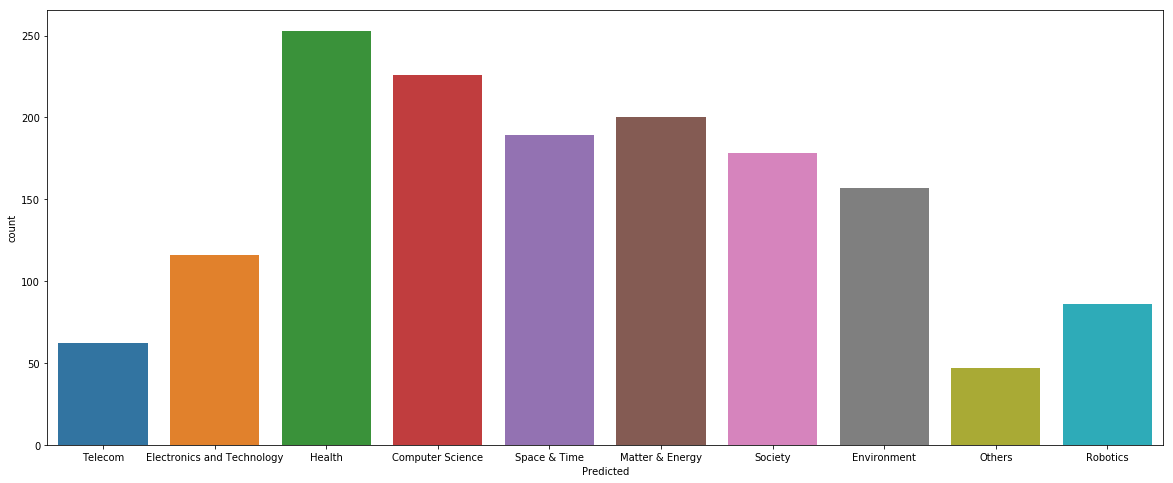

In [32]:
fig, ax = plt.subplots(figsize=(20,8))
sns.countplot(df_comparison['Predicted'])
plt.show()

In [33]:
to_predict = pd.concat([ACM,Science,Computers_and_Math,Research]) ## Predicted the new categories of articles which were having mixed data

In [34]:
predict = nb.predict(to_predict['Text'])

In [35]:
to_predict['Predicted'] = predict

In [36]:
to_predict[['Category','Predicted']].head()

,Category,Predicted
9693,ACM,Computer Science
9205,ACM,Telecom
9204,ACM,Computer Science
9203,ACM,Computer Science
9202,ACM,Computer Science


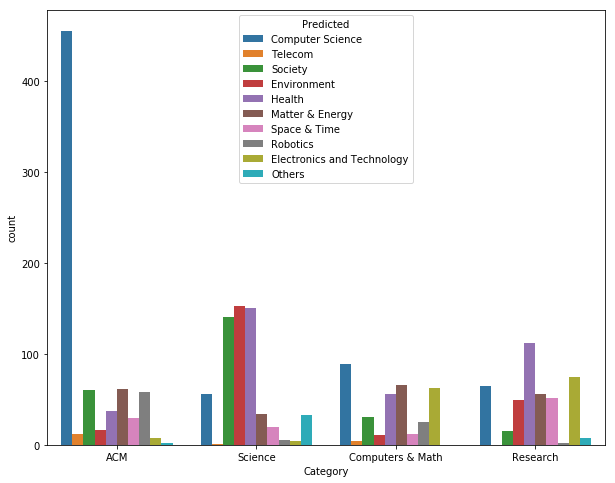

In [37]:
fig, ax = plt.subplots(figsize=(10,8))
sns.countplot(to_predict['Category'],hue=to_predict['Predicted'])
plt.show()

In [38]:
converted = pd.DataFrame.copy(to_predict)
converted.reset_index(drop=True,inplace=True)
converted['Category'] = converted['Predicted']
converted = converted.drop(['Predicted'],axis=1)


In [39]:
converted.head()

,Category,Date,Heading,Source,Text,Time,URL,Length,Old_Category
0,Computer Science,2018-04-23,Junior AI Researchers in Demand by Universitie...,ACM,Research software provider Element AI Canada a...,-,https://www.nature.com/articles/d41586-019-012...,828,ACM
1,Telecom,2019-05-02,Design Flaws Create Security Vulnerabilities f...,ACM,Researchers North Carolina State University NC...,-,https://news.ncsu.edu/2019/05/design-flaws-sma...,717,ACM
2,Computer Science,2019-05-02,Unhackable: New Chip Stops Attacks Before They...,ACM,University Michigan U M researcher designed ne...,-,https://news.umich.edu/unhackable-new-chip-sto...,812,ACM
3,Computer Science,2019-05-02,"Toyota to Invest $100 Million in Self-Driving,...",ACM,Toyota established million venture fund autono...,-,https://www.cnbc.com/2019/05/02/toyota-to-inve...,745,ACM
4,Computer Science,2019-05-02,Distracted by Tech While Driving? The Answer M...,ACM,Advanced driver assistance technology help pre...,-,https://www.nytimes.com/2019/05/02/business/di...,966,ACM


In [40]:
df_all = pd.concat([df_all,converted]) ## Merging Both the dataframes old and new

### After combining remaining categories final data frame to be analysed 

In [41]:
df_all['Category'].value_counts()

Computer Science              1595
Health                        1515
Matter & Energy               1413
Space & Time                  1139
Environment                   1064
Society                       1038
Electronics and Technology     667
Robotics                       569
Telecom                        347
Others                         347
Name: Category, dtype: int64

In [42]:
df_all['Text'] = df_all['Text'].apply(remove_apostrophe)
df_all['Text'] = df_all['Text'].apply(remove_punctuation)
df_all['Text'] = df_all['Text'].apply(convert_numbers)
df_all['Text'] = df_all['Text'].apply(clean)

In [43]:
df_all.head()

,Category,Date,Heading,Source,Text,Time,URL,Length,Old_Category
1549,Computer Science,2015-06-10,Longstanding problem put to rest,MIT News,Comparing genome different specie — different ...,-,http://news.mit.edu/2015/algorithm-genome-best...,6296,Computer Science
1548,Computer Science,2015-06-10,Breaking down social networks in a city,MIT News,Until study human interaction mobile communica...,-,http://news.mit.edu/2015/breaking-down-social-...,5247,Computer Science
1545,Computer Science,2015-06-12,Centimeter-long origami robot,MIT News,At recent International Conference Robotics Au...,-,http://news.mit.edu/2015/centimeter-long-origa...,4452,Computer Science
1543,Computer Science,2015-06-16,Amplifying small motions in large motions,MIT News,For year research group MIT computer science e...,-,http://news.mit.edu/2015/algorithm-magnifies-m...,4119,Computer Science
1542,Computer Science,2015-06-16,MIT-Singapore design center creates free softw...,MIT News,Network analysis — mathematical analysis relat...,-,http://news.mit.edu/2015/mit-singapore-design-...,3257,Computer Science


In [44]:
X_all=df_all['Text']
y_all = df_all['Category']
from sklearn.model_selection import train_test_split
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(X_all, y_all, test_size=0.2, random_state=42)

my_tags_all = df_all['Category'].unique()

In [45]:
from sklearn.naive_bayes import MultinomialNB

nb = Pipeline([('vect', CountVectorizer(max_df=1000,min_df=70,ngram_range=(1, 2))),
               ('tfidf', TfidfTransformer(norm='l2')),
               ('clf', MultinomialNB()),
              ])
nb.fit(X_train_all, y_train_all)
from sklearn.metrics import classification_report
y_pred_all = nb.predict(X_test_all)

print('accuracy %s' % accuracy_score(y_pred_all, y_test_all))
print(classification_report(y_test_all, y_pred_all,target_names=my_tags_all))

accuracy 0.7364620938628159
                            precision    recall  f1-score   support

          Computer Science       0.66      0.93      0.77       338
Electronics and Technology       0.64      0.75      0.69       126
               Environment       0.71      0.67      0.69       206
                    Health       0.70      0.76      0.73       292
           Matter & Energy       0.78      0.59      0.67       288
                    Others       0.94      0.60      0.73        55
                  Robotics       0.81      0.63      0.71       126
                   Society       0.74      0.74      0.74       217
              Space & Time       0.91      0.83      0.87       223
                   Telecom       0.83      0.44      0.58        68

               avg / total       0.75      0.74      0.73      1939



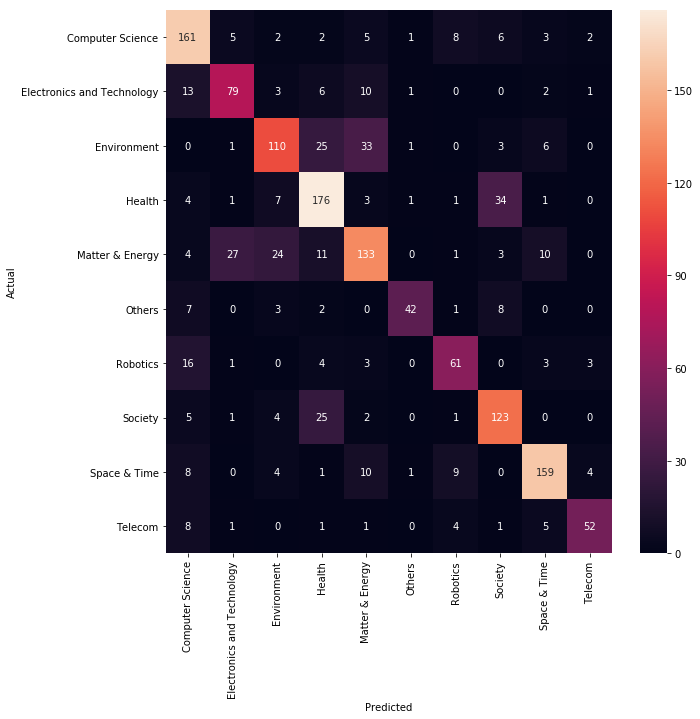

In [46]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=my_tags_all, yticklabels=my_tags_all)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()